In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
terror=pd.read_excel('./data/basedata.xlsx',encoding='ISO-8859-1')
terror=terror[['eventid','nkill','nwound','propextent','region','targtype1','extended','crit1','crit2','crit3']]
terror['crit']=terror['crit1']+terror['crit2']+terror['crit3']
terror.head(3)

,eventid,nkill,nwound,propextent,region,targtype1,extended,crit1,crit2,crit3,crit
0,199801010001,104.0,6.0,NaN,11,4,0,1,1,1,3
1,199801010002,0.0,3.0,NaN,9,19,0,1,1,1,3
2,199801010003,1.0,0.0,NaN,8,14,0,1,1,1,3


# 数据处理

In [3]:
terror['propextent'] = ((4-terror['propextent'].where(terror['propextent'].notnull(), 4))/terror['propextent'].max())*10
terror['crit'] = (terror['crit']/terror['crit'].max())*10
terror['extended'] = (terror['extended']/terror['extended'].max())*10
terror['nkill'] = terror['nkill'].where(terror['nkill'].notnull(), 0)
terror['nwound'] = terror['nwound'].where(terror['nwound'].notnull(), 0)
terror['casualities'] = terror['nkill']+terror['nwound']

In [4]:
nkill_bins = [-1,10,30,60,100,200,400,700,1100,1500,1600]
terror['nkill'] = pd.cut((terror['nkill']), nkill_bins, labels=[int(i+1) for i in range(10)])

In [5]:
nkill_bins = [-1,10,30,60,100,200,400,700,1500,2500,9000]
terror['nwound'] = pd.cut((terror['nwound']), nkill_bins, labels=[int(i+1) for i in range(10)])

In [6]:
def map_dit(data,col):
    sum_ = []
    col_dit = {}
    col_set = set(data[col].values)
    for region in col_set:
        data_sel = data[data[col] == region]
        reg_sum = np.array(data_sel.nkill).sum()
        sum_.append(reg_sum)
    sum_arr = np.array(sum_)
#     nor = sum_arr/sum_arr.sum() *10
    #nor_list = list(nor.astype(int))
    for i,j in zip(col_set , sum_arr):
        col_dit[i] = j
    col_dit = dict(sorted(col_dit.items(), key=lambda d:d[1]))
    for index,i in enumerate(col_dit.keys()):
        col_dit[i] = (index+1)/len(col_dit)*10
    print(col_dit)
    return col_dit
map_dic = map_dit(terror,'region')
to_num = lambda word:map_dic.get(word)
terror['region'] = [to_num(po) for po in terror['region']]
map_dic = map_dit(terror,'targtype1')
to_num = lambda word:map_dic.get(word)
terror['targtype1'] = [to_num(po) for po in terror['targtype1']]

{12: 0.8333333333333333, 2: 1.6666666666666665, 4: 2.5, 7: 3.333333333333333, 1: 4.166666666666667, 3: 5.0, 8: 5.833333333333334, 9: 6.666666666666666, 5: 7.5, 11: 8.333333333333334, 6: 9.166666666666666, 10: 10.0}
{5: 0.4545454545454546, 13: 0.9090909090909092, 9: 1.3636363636363635, 11: 1.8181818181818183, 18: 2.2727272727272725, 6: 2.727272727272727, 16: 3.1818181818181817, 12: 3.6363636363636367, 22: 4.090909090909091, 7: 4.545454545454545, 10: 5.0, 21: 5.454545454545454, 17: 5.909090909090909, 8: 6.363636363636363, 19: 6.8181818181818175, 15: 7.272727272727273, 20: 7.727272727272727, 1: 8.181818181818182, 2: 8.636363636363637, 3: 9.09090909090909, 4: 9.545454545454547, 14: 10.0}


In [7]:
terror

,eventid,nkill,nwound,propextent,region,targtype1,extended,crit1,crit2,crit3,crit,casualities
0,199801010001,5,1,0.0,8.333333,9.545455,0.0,1,1,1,10.000000,110.0
1,199801010002,1,1,0.0,6.666667,6.818182,0.0,1,1,1,10.000000,3.0
2,199801010003,1,1,0.0,5.833333,10.000000,0.0,1,1,1,10.000000,1.0
3,199801020001,1,1,2.5,10.000000,4.545455,0.0,1,1,1,10.000000,0.0
4,199801020002,1,1,0.0,10.000000,10.000000,0.0,1,1,1,10.000000,1.0
5,199801040001,1,1,0.0,6.666667,9.090909,0.0,1,1,1,10.000000,0.0
6,199801040002,1,1,0.0,6.666667,9.090909,0.0,1,1,1,10.000000,0.0
7,199801050001,1,1,0.0,5.833333,9.090909,0.0,1,1,1,10.000000,0.0
8,199801050002,1,1,0.0,5.000000,5.000000,0.0,1,1,1,10.000000,1.0
9,199801050003,2,1,0.0,8.333333,10.000000,0.0,1,1,1,10.000000,16.0


# 层次分析法分析系数

In [8]:
zhijie_sunshi = 0.4*np.array(terror.nkill)+0.2*np.array(terror.nwound)+0.4*terror.propextent
jianjie_sunshi = 0.2762*terror['region']+0.4874*terror['targtype1']+0.1182*terror['extended']+0.1182*terror['crit']
final_score = 0.9*zhijie_sunshi + 0.1*jianjie_sunshi

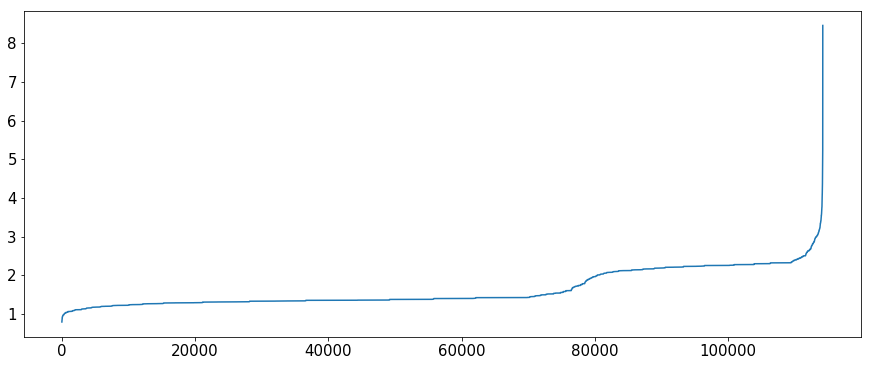

In [17]:
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(list(final_score.sort_values()))

In [19]:
nkill_bins = [-1,1,2,3,4,10]
terror['final_score'] = final_score
terror['level'] = pd.cut(final_score, nkill_bins, labels=[int(i+1) for i in range(5)])

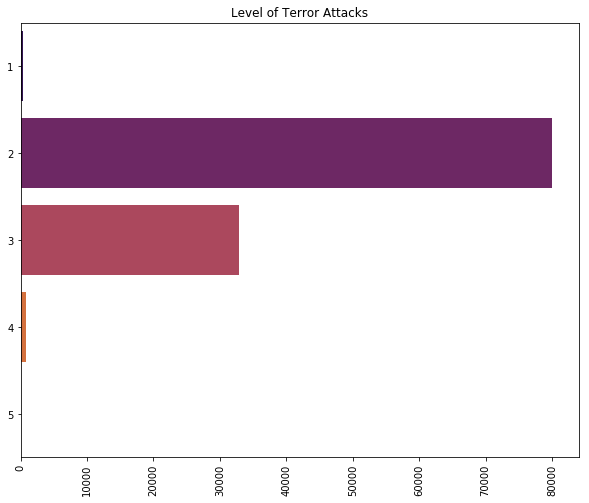

In [27]:
import seaborn as sns
sns.barplot(terror['level'].value_counts().values,terror['level'].value_counts().index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Level of Terror Attacks')
plt.show()

In [25]:
terror['level'].value_counts().index

CategoricalIndex([2, 3, 4, 1, 5], categories=[1, 2, 3, 4, 5], ordered=True, dtype='category')

In [13]:
terror[['final_score','level']].to_csv('./data/level.csv',index=False)

In [14]:
terror.sort_values(by="final_score",ascending=False)

,eventid,nkill,nwound,propextent,region,targtype1,extended,crit1,crit2,crit3,crit,casualities,final_score,level
5619,200109110004,9,10,7.5,4.166667,10.000000,0.0,1,1,1,10.000000,9574.0,8.460683,5
5620,200109110005,9,10,7.5,4.166667,10.000000,0.0,1,1,1,10.000000,9574.0,8.460683,5
564,199808070002,6,10,5.0,8.333333,4.545455,0.0,1,1,1,10.000000,4224.0,6.329912,5
16511,200708160008,6,8,5.0,10.000000,10.000000,0.0,1,1,1,10.000000,1000.0,6.281800,5
16503,200708150005,6,8,5.0,10.000000,10.000000,0.0,1,1,1,10.000000,1000.0,6.281800,5
5621,200109110006,5,5,7.5,4.166667,8.636364,0.0,1,1,1,10.000000,296.0,6.054220,5
13591,200607120001,5,8,5.0,9.166667,6.818182,0.0,1,1,1,10.000000,1005.0,5.743702,5
25764,200908190001,5,7,5.0,10.000000,8.636364,0.0,1,1,1,10.000000,654.0,5.675336,5
5139,200108110012,6,5,5.0,8.333333,6.818182,0.0,1,1,1,10.000000,419.0,5.540685,5
9446,200409010002,6,8,2.5,6.666667,6.363636,10.0,1,1,1,10.000000,1071.0,5.230697,5


In [12]:
need_list = [200108110012,200511180002,200901170021,201402110015,201405010071,201411070002,201412160041,201508010015,201705080012]
for i in need_list:
    print(int(terror.loc[terror['eventid']==i]['level']))

5
5
4
2
2
3
3
2
3


In [22]:
terror['level'].value_counts()

2    79984
3    32907
4      854
1      348
5       90
Name: level, dtype: int64